<font color=blue> Привет еще раз. Спасибо, что доделал работу. Мои комментарии на этот раз выделены синим цветом.
    
---


---
## Комментарий от наставника

Привет! Спасибо, что прислал задание:) В целом, работа производит неплохое впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой *Комментарий от наставника*. Пострайся учесть эти комментарии.

---

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры влияющие на стоимость. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*План работы:*

1) Изучить время продажи квартиры.  Сколько обычно занимает продажа? Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

2) Выяснить, какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучить зависимость от даты размещения: дня недели, месяца и года. Выделить 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.

3) Выделить квартиры в Санкт-Петербурге и выяснить, какая область входит в центр.

4) Для квартир в центре изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

5) Сравнить результаты для центра города с общими результатами по всему городу.

---
## Комментарий от наставника


Правильно, что есть краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить краткий план того, что надо сделать (если этот план имеется). Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.
    
---
#### Ответ на комментарий
постарался исправить текст согласно комментарию

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импорт библиотек

In [284]:
import pandas as pd # импорт библиотеки pandas

Прочитаем файл real_estate.csv и сохраним его в переменной data.

In [285]:
data = pd.read_csv('/datasets/real_estate_data.csv') # чтение файла с данными с сохранением в data

Получение первых 10 строк таблицы.

---
## Комментарий от наставника

Неудачные попытки считывания данных лучше не оставлять, они не несут в себе полезной для анализа информации.

---
#### Ответ на комментарий
удалил неудачные попытки считывания данных

In [286]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# чтение файла с данными, разделение данных на столбцы, и  сохранение в data
data.head(10) # получение первых 10 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Общая информация о данных таблицы data.

In [287]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную информацию подробнее.
Всего в таблице 22 столбца, 14 столбцов с вещественным типом данных - *float*, 3 столбца с целочисленным типом данных - *int*, 3 столбца с типом данных - *object* и 2 столбца с лоическим типом данных - *bool*. Здесь стоит отметить, что столбец - first_day_exposition имеет тип данных - object, в то время как содержащаяся в нём информация должна относиться к типу данных - дата/время - *dt*. Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

Подробно разберём, какие в data столбцы и какую информацию они содержат:
* *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
* *balcony* — число балконов
* *ceiling_height* — высота потолков (м)
* *cityCenters_nearest* — расстояние до центра города (м)
* *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
* *first_day_exposition* — дата публикации
* *floor* — этаж
* *floors_total* — всего этажей в доме
* *is_apartment* — апартаменты (булев тип)
* *kitchen_area* — площадь кухни в квадратных метрах (м²)
* *last_price* — цена на момент снятия с публикации
* *living_area* — жилая площадь в квадратных метрах(м²)
* *locality_name* — название населённого пункта
* *open_plan* — свободная планировка (булев тип)
* *parks_around3000* — число парков в радиусе 3 км
* *parks_nearest* — расстояние до ближайшего парка (м)
* *ponds_around3000* — число водоёмов в радиусе 3 км
* *ponds_nearest* — расстояние до ближайшего водоёма (м)
* *rooms* — число комнат
* *studio* — квартира-студия (булев тип)
* *total_area* — площадь квартиры в квадратных метрах (м²)
* *total_images* — число фотографий квартиры в объявлении

Пояснение: *апартаменты* — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Вывод

Таблица содержит подробную информацию о квартирах, выставленных на продажу в Санкт-Питербуре и ближайших населённых пунктах за несколько лет. При просмотре общей информации о таблице, выявлено несколько проблем. Во-первых, необходимо изменить тип данных у некоторых столбцов. Во-вторых, заполнить пропуски в таблице, вызванных разными причинами (информация не указана продавцом, отсутствие парков или прудов в близи от дома, актуальность объявления)

---
## Комментарий от наставника

У меня имеется пара комментариев по данному шагу:
- следует давать переменным осознанные имена. Таблица про квартиры - название надо бы выбрать соответствующее;
- Можно высказать варианты обработки пропусков. Здорово, что указаны возможные причины их появления.

Первый взгляд на таблицу выполнен.

---
#### Ответ на комментарий
В рамках общего учебного проекта, я решил не переименовывать столбцы для того, чтобы не вносить путаницы при обсуждении проекта с сокурсниками и преподавателем в общем чате. Надеюсь, что сборный проект будет более индивиуальным.

### Шаг 2. Предобработка данных

#### Обработка пропусков

Подсчитаем общее количество пропусков в кажом столбце

In [288]:
data.isnull().sum() # подсчёт пропуенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим столбец с высотой потолков в квартирах - *ceiling_height*.
В этом столбце могут быть не только пропуски, но и некоректные значения. Для исключения ошибок и проблем в дальнейшем, стоит на этом этапе отбросить некоректные значения и аномалии. Округлим значения до первого знака после запятой. Посмотрим на диаграмму размаха и отбросим некорректные значения.

(2, 3.5)

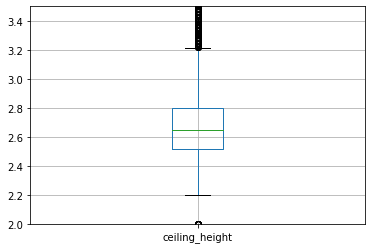

In [289]:
import matplotlib.pyplot as plt # импорт библиотеки matpotlib
data.boxplot(column='ceiling_height') # отображение диаграммы ящика с усами
plt.ylim(2, 3.5) # изменение осей графика

К сожалению, на основе данного графика невозможно принять решение о том, какие значения стоит оставить, а какие отбросить. Поэтому будем руководствоваться нормативными документами. По СНиП минимальная высота потолков в жилых комнатах должна быть не ниже 2.5 м. Примем за нижнюю границу высоту чуть меньшую, а именно 2.4 м

In [290]:
# отсортируем таблицу, так чтобы потолки были высотой от 2.4 м
data = data.query('ceiling_height >= 2.4')

Элитные квартиры могут иметь высоту потолков больше 3 метров, знаменитые "Сталинки" имеют высоту потолков 3.5 м. Посчитаем объявления с квартирами больше данной величины и решим, где провести верхнюю границу.

In [291]:
print(data[data['ceiling_height'] > 3.5]['ceiling_height'].value_counts().head(15))
# посмотрим на значения высоты потолков выше 3.5 м и их количество
print('Всего:', data[data['ceiling_height'] > 3.5]['ceiling_height'].count())
# сосчитаем общее число некорректных значений высоты потолков квартир выше 3.5 м

4.00     39
3.60     36
3.70     30
3.80     20
3.55     18
3.90     14
4.20     10
3.75      8
27.00     8
3.95      8
25.00     7
4.50      7
3.54      6
3.56      5
3.65      4
Name: ceiling_height, dtype: int64
Всего: 304


Верхнее значение высоты потолков проведём по значению 4.20 м.

In [292]:
# отсортируем таблицу, так чтобы потолки были высотой от 2.4 м
data = data.query('ceiling_height <= 4.2')

Заполним пропуски в высоте потолков в зависимости от этажности зданий. И убедимся в отсутствии пропусков в данном столбце (ceiling_height):

In [293]:
# заполняем пропуски в высоте потолков - 'ceiling_height' в зависимости от общего количества этажей в здании - 'income_type' 
data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'), inplace=True)
# подсчёт пропусков после заполнения
data['ceiling_height'].isnull().sum()

0

---
## Комментарий от наставника

Пропуски заполнены приемлемым образом.

---

---
## Комментарий от наставника

Выбросы стоит удалять после всех замен в разделе анализа данных. Делать это надо на основании диаграммы размаха.

---
#### Ответ на комментарий
Пропуски и некорректные значения в столбце с высотой потолков создавали проблемы далее, поэтому я решил отбросить некорректные значения и выбросы уже на этом этапе.

Заполним пропуски в этажности зданий в зависимости от высоты потолков. И убедимся в отсутствии пропусков в данном столбце (floors_total):

In [294]:
# заполняем пропуски в высоте потолков - 'ceiling_height' в зависимости от общего количества этажей в здании - 'income_type' 
data['floors_total'].fillna(data.groupby('ceiling_height')['floors_total'].transform('median'), inplace=True)
# подсчёт пропусков после заполнения
data['floors_total'].isnull().sum()

0

Заполним пропуски в площади жилой зоны и кухни в зависимости от числа комнат. Данный метод заполнения может исказить значения для квартир-студий, комнат в коммунальных квартирах или общежитии. Убедимся в отсутствии пропусков в столбцах (living_area, kitchen_area). Но перед этим проверим столбец rooms на наличие аномальных значений.

In [295]:
data['rooms'].value_counts()

2     4825
1     4592
3     3773
4      797
5      225
0       80
6       71
7       41
9        7
8        6
10       3
11       2
15       1
14       1
12       1
16       1
Name: rooms, dtype: int64

Нулевые значения числа комнат относятся к квартирам-студиям.

---
## Комментарий от наставника

0 комнат у квартир-студий в данных, удалять их не стоит.

---
#### Ответ на комментарий
вернул удалённые значения

In [296]:
# заполняем пропуски в площади жилой зоны - 'living_area' в зависимости от общей площади - 'total_area' 
data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'), inplace=True)
# подсчёт пропусков после заполнения
data['living_area'].isnull().sum()

0

In [297]:
# площадь кухни находят по разности: из общей площади вычтем площадь жилой зоны
# данные с уже указанной площадью кухни не пострадают, а пропущенные значения заполним
data['kitchen_area'] = data['total_area'] - data['living_area']
data['kitchen_area'].isnull().sum()

0

<font color=blue> Все-таки в квартире есть и другие помещения. Стоит найти доли всех пространств и заполнить пропуски, исходя из них.
    
---


---
## Комментарий от наставника

При таком заполнении пропусков в площадях стоит проконтроллировать ситуацию, когда сумма площадей кухни и жилой площади больше, чем общая площадь квартиры.

---
#### Ответ на комментарий
изменил способ заполнения пропусков в столбце с площадью кухни

Посмотрим на оставшиеся пропущенные значения в таблце и решим, что делать с ними дальше.

In [298]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            12588
studio                      0
open_plan                   0
kitchen_area                0
balcony                  7214
locality_name              14
airports_nearest         2933
cityCenters_nearest      2916
parks_around3000         2915
parks_nearest            9162
ponds_around3000         2915
ponds_nearest            8727
days_exposition          2438
dtype: int64

Стоит отбросить строки с пропущенными названия населённых пунктов. Пропущенные значения в столбцах is_apartment и число балконов (balcony) неинтересны для данного исследования. Пропуски в столбце - days_exposition, говорят о том, что объявления не закрыты. Пропуски в остальных столбцах, возможно, связаны с тем, что данные объявления относятся не к Санкт-Петербургу, а близлежащим населённым пунктам. Если это так, то заполнить их в ручную не представляется возможным в рамках данного исследования. 

---
## Комментарий от наставника

Почему пропуски заполняются медианным по Санкт-Петербургу, когда пропуски в данном столбце есть у других городов? Так можно испортить данные. Лучше оставить эти пропуски или же заполнить их индикаторными значениями, например, -1.

---
#### Ответ на комментарий
Оставил пропуски в столбце "расстояние до центра города", так как их действительно невозможно адекватно заполнить

#### Замена типа данных

Посмотрим на общую информацию о таблице, чтобы решить в каких столбцах имеет смысл изменить тип данных

In [299]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14426 entries, 0 to 23698
Data columns (total 22 columns):
total_images            14426 non-null int64
last_price              14426 non-null float64
total_area              14426 non-null float64
first_day_exposition    14426 non-null object
rooms                   14426 non-null int64
ceiling_height          14426 non-null float64
floors_total            14426 non-null float64
living_area             14426 non-null float64
floor                   14426 non-null int64
is_apartment            1838 non-null object
studio                  14426 non-null bool
open_plan               14426 non-null bool
kitchen_area            14426 non-null float64
balcony                 7212 non-null float64
locality_name           14412 non-null object
airports_nearest        11493 non-null float64
cityCenters_nearest     11510 non-null float64
parks_around3000        11511 non-null float64
parks_nearest           5264 non-null float64
ponds_around3000

Список cтолбцов, в которых может потребоваться изменить тип данных:
* first_day_exposition - заменить на тип данных - *datetime* (так как это дата публикации)
* is_apartment - заменить на тип данных - *bool* (жилое помещение либо является апортаментами, либо нет)
* last_price, floors_total, balcony, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, cityCenters_nearest - заменить на тип данных - *int* 
(для удобства лучше заменить на тип анных *int* так как это всё категориальные переменные)

Заменим тип данных в столбце согласно списку:

In [300]:
# перевод из строки в дату и время
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# перевод в тип данных *int* столбца *floors_total* и *last_price*
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [301]:
data.dtypes 

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Обработка дубликатов

Удалим из таблицы явные дубликаты, которые могли возникнуть при заполнении пропущенных значений.

In [302]:
# удалим из таблицы данных data дубликаты
data = data.drop_duplicates().reset_index(drop= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14426 entries, 0 to 14425
Data columns (total 22 columns):
total_images            14426 non-null int64
last_price              14426 non-null int64
total_area              14426 non-null float64
first_day_exposition    14426 non-null datetime64[ns]
rooms                   14426 non-null int64
ceiling_height          14426 non-null float64
floors_total            14426 non-null int64
living_area             14426 non-null float64
floor                   14426 non-null int64
is_apartment            1838 non-null object
studio                  14426 non-null bool
open_plan               14426 non-null bool
kitchen_area            14426 non-null float64
balcony                 7212 non-null float64
locality_name           14412 non-null object
airports_nearest        11493 non-null float64
cityCenters_nearest     11510 non-null float64
parks_around3000        11511 non-null float64
parks_nearest           5264 non-null float64
ponds_around

Посмотрим список уникальных значений имён населённых пунктов на наличие скрытых убликатов

In [303]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок городского типа Красный Бор',
       'посёлок Мурино', 'Сертолово', 'Гатчина', 'поселок Мурино',
       'Ломоносов', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Колпино', 'Кировск', 'деревня Новое Девяткино',
       'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'посёлок Шушары', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'поселок Оредеж',
       

Напишим функцию для генерации кратких имён населённых пунктов путём вычитания множеств значений.

In [304]:
data['locality_name'] = data['locality_name'].astype('str') # изменяем тип данных на строковый, для корректной работы функции
# функция для вычитания множеств
def short_locality_name(text):
    unnecessary_words = (['посёлок','городской','деревня','поселок','городского','типа','садовое', 
                      'товарищество','село','городской','коттеджный', 'при', 'железнодорожной', 'станции'])
# Список нежелательных слов, составленный вручную
    line = list(set(text.split())-set(unnecessary_words))
# текст из ячейке locality_name делится на отдельные слова, знаком пробела
# затем производится вычитание значений одного множества из другого
# переводим множество в список
    return (' '.join(line)) # объеденяем элементы нового списка через пробел
data['short_locality_name'] = data['locality_name'].apply(short_locality_name)
# обавляем к таблице столбец с краткими названиями населённых пунктов
data['locality_name'].isnull().sum()
# проверим отсутствие нулевых значений в именах населённых пунктов

0

### Выводы

Таблица соержит множество пропусков, так как продавец квартиры при публикации объявлений заполняет строго обязательные поля, а необязательные поля заполняют по своему усмотрению. Также это может служить причиной появления пропусков и ошибок в столбцах таблицы данных, которые рассчитываются на основании введённых продавцом информации. Пропуски в столбцах с интересующими нас данными были заполнены, данные в них привеены к нужному типу и убликаты удалены стандартным методом.

---
## Комментарий от наставника

Данные подготовлены к дальнейшему анализу.

---

### Шаг 3. Посчитайте и добавьте в таблицу

In [305]:
# добавление столбца с ценой 1 каратного метра и округлим до целого значения
data['cost_per_square_meter'] = round(data['last_price'] / data['total_area'], -1)
# добавление столбца день недели публикации объявления понедельник - 0, воскресенье - 6
data['day_publication'] = data['first_day_exposition'].dt.weekday
# добавление столбца месяца публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month
# добавление столбца года публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year
# обавим столбец с категориями квартир в зависимости от располажения на этаже
def category_floor_housing(row):
# функция для одной строки. категоризация данных по двум столбцам этаж и всего этажей
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1 and floors_total >= 1:
        return 'первый'
    if floor != 1 and floor == floors_total:
        return 'последний'
    return 'другой'
# добавляем столбец с категориями квартир в зависимости от этажа
# если 'floor' = 1 - первый этаж
# если 'floor' = floors_total и не первый, то последний
# все остальные записаны в категорию ругие
data['category_floor_housing'] = data.apply(category_floor_housing, axis = 1)
# добавляем столбец с отноением жилой площщади к общей площади и округлим до 3 знака после запятой
data['living/total_area'] = round(data['living_area'] / data['total_area'], 3)
# добавляем столбец с отноением площади кухни к общей площади и округлим до 3 знака после запятой
data['kitchen/total_area'] = round(data['kitchen_area'] / data['total_area'], 3)

Перед тем как переходить к следующей части посмотрим на общий вид таблицы и общую информацию о ней

In [306]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,short_locality_name,cost_per_square_meter,day_publication,month_publication,year_publication,category_floor_housing,living/total_area,kitchen/total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,755.0,NaN,Санкт-Петербург,120370.0,3,3,2019,другой,0.472,0.528
1,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,48.0,121.0,Санкт-Петербург,100000.0,1,6,2018,другой,0.320,0.680
2,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,NaN,289.0,Санкт-Петербург,88520.0,6,2,2017,другой,0.715,0.285
3,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,553.0,137.0,Санкт-Петербург,127530.0,3,11,2017,другой,0.513,0.487
4,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,...,298.0,366.0,Петергоф,82940.0,5,7,2017,последний,0.631,0.369


In [307]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14426 entries, 0 to 14425
Data columns (total 30 columns):
total_images              14426 non-null int64
last_price                14426 non-null int64
total_area                14426 non-null float64
first_day_exposition      14426 non-null datetime64[ns]
rooms                     14426 non-null int64
ceiling_height            14426 non-null float64
floors_total              14426 non-null int64
living_area               14426 non-null float64
floor                     14426 non-null int64
is_apartment              1838 non-null object
studio                    14426 non-null bool
open_plan                 14426 non-null bool
kitchen_area              14426 non-null float64
balcony                   7212 non-null float64
locality_name             14426 non-null object
airports_nearest          11493 non-null float64
cityCenters_nearest       11510 non-null float64
parks_around3000          11511 non-null float64
parks_nearest         

### Выводы

В таблицу были добавлены новые метрики: стоимость 1 квадратного метра, отношение жилой площщади к общей площади квартиры и отношение площщади кухни к общей площщади. Была проведена категоризация квартир в зависимости от этажа (на первом, на последнем и все остальные). Добавлены столбцы с днём, месяцем и годом публикации объявлений.

---
## Комментарий от наставника

Добавление необходимых параметров выполнено верно.

---

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Посмотрим на частоту объявлений в зависимости от числа комнат.

In [308]:
data['rooms'].value_counts()

2     4825
1     4592
3     3773
4      797
5      225
0       80
6       71
7       41
9        7
8        6
10       3
11       2
15       1
14       1
12       1
16       1
Name: rooms, dtype: int64

Посмотрим сводную таблицу по числу комнат (категориальная переменная), для каждой найдём среднюю площадь, цену и высоту потолков

In [309]:
rooms_pivot = round(data.pivot_table(index = 'rooms', values = ['total_area','last_price','ceiling_height']), 2)
rooms_pivot

,ceiling_height,last_price,total_area
rooms,,,
0,2.77,4.080927e+06,32.51
1,2.67,3.919878e+06,37.70
2,2.70,5.760051e+06,55.82
3,2.75,8.285289e+06,77.68
4,2.89,1.321217e+07,106.33
5,3.13,2.130531e+07,160.43
6,3.19,3.095607e+07,194.13
7,3.36,4.050595e+07,257.35
8,3.43,4.858167e+07,229.75


Абсолютное большинство квартир выставленных на продажу имеют не более 4 комнат. Жильё с большим числом комнат является либо элитным и располагается ближе к центру города, либо загородные особняки. Квартиры с числом комнат 1, 2 или 3 имеют примерно одинаквую высоту потолков, что говорит о том что они находятся в зданиях, построенных по типовым проектам. С ростом числа комнат (и следовательно общей площади) увеличивается и стоимость жилья. Жильё со множеством комнат имеет большую площадь, что очевидно.

Построим гистограммы для этих параметров: общая площадь, цена, число комнат, высота потолков

In [310]:
import math # импорт модуля math
import numpy as np # импорт библиотеки numpy
def function_for_building_histograms(column): # функция для построения гистограмм
    N = len(column.unique()) # находим объём выборки, как длину списка уникальных значений
    k = round(math.sqrt(N)) # определение “оптимального” числа интервалов как квадратный корень из N
    # можно также воспользоваться формулой Брукса и Каррузера : 5*math.log10(N)
    Q1 = np.percentile(column,25) # первый квантиль
    Q3 = np.percentile(column,75) # третий квантиль
    IQR = Q3 - Q1 # межквартильный диапазон
    max_value = round(Q3 + 3 * IQR) # # минимальное значение интервала построения графика
    min_value = round(Q1 - 3 * IQR) # максимальное значение интервала построения графика
    return column.plot(kind='hist', bins=k, legend=True, range=(0,  max_value))
    # так как у нас все значения больше нуля, примим за минимум 0
analysis = data.iloc[:,[1,2,4,5]].copy(deep=True)
# выберим столбцы со значениями общей площади, цены, числа комнат, высоты потолков
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14426 entries, 0 to 14425
Data columns (total 4 columns):
last_price        14426 non-null int64
total_area        14426 non-null float64
rooms             14426 non-null int64
ceiling_height    14426 non-null float64
dtypes: float64(2), int64(2)
memory usage: 450.9 KB


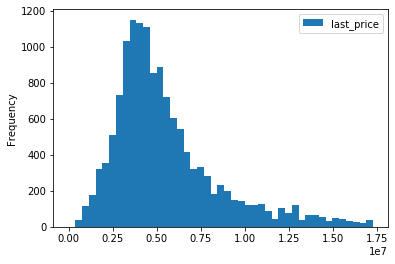

In [311]:
# гистограмма цен на жильё
function_for_building_histograms(analysis['last_price'])

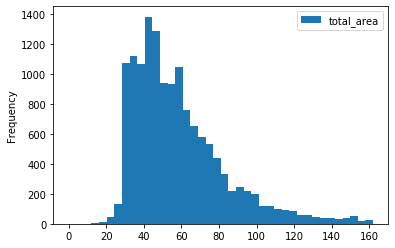

In [312]:
# гистограмма общей площади
function_for_building_histograms(analysis['total_area'])

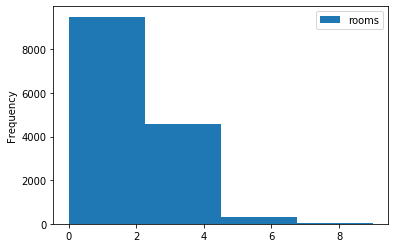

In [313]:
# гистограмма числа комнат
function_for_building_histograms(analysis['rooms'])

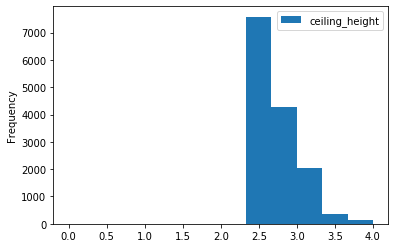

In [314]:
# гистограмма высоты потолков
function_for_building_histograms(analysis['ceiling_height'])

Так как число объявлений о проажи квартир с 1, 2 или 3 комнатами привалируют, мы видим соответствующие им пики на всех гистограммах. Так же есть явная положительная корреляция между общей площщадью квартиры и ценой.

---
## Комментарий от наставника

При анализе ты проводишь однотипные действия на каждом шаге. Попробуй автоматизировать процесс построения графиков через цикл или собственную функцию. Интервал построения графиков рассчитывай автоматически. Например, от Q1-3\*IQR до Q3+3\*IQR. Число корзин выбери оптимальным для всех графиков.

---
#### Ответ на комментарий
добавил функцию, которая принемает на вход столбец и вовращает гистограмму.

<font color=blue> Хороший способ автоматизации построения графиков. Все сделано правильно.
    
---


Изучите время продажи квартиры

count    11988.000000
mean       190.292793
std        228.535724
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64
Среднее время продажи 190.0
Медиана времени продажи 103.0


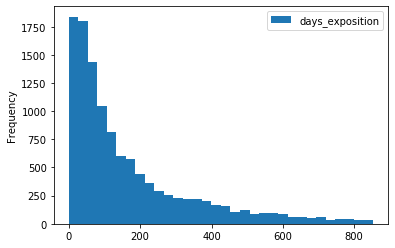

In [315]:
# оставим в таблице данных только проданные квартиры
sold_housing = data.copy(deep=True) # копируем таблицу данных и далее можем работать с ней
sold_housing_time = sold_housing.copy(deep=True) # для изучения времени продажи удалим ещё не проданные квартиры
sold_housing_time.dropna(subset=['days_exposition'], inplace = True) 
# удаляем пропуски в days_exposition, т.е. строки с ещё не проданными квартирами
sold_housing_time['days_exposition'] = sold_housing_time['days_exposition'].astype('int') # изменяем тип данных на целочисленный
function_for_building_histograms(sold_housing_time['days_exposition'])
print(data['days_exposition'].describe()) # числовое описание данных в столбце время продажи
print('Среднее время продажи {}'.format(round(data['days_exposition'].mean(), 0)))
print('Медиана времени продажи {}'.format(round(data['days_exposition'].median(), 0)))

Обычно продажа квартиры занимает до 230 дней, но в основном в первые 3 месяца после публикации. Продажа квартиры произошла быстро, если время продажи не превышает 45 дней. Если продажа квартиры произошла спустя 230 дней, будем считать её долой.

---
## Комментарий от наставника

Здорово, что есть гипотезы о быстрых и долгих сделках.

---

Отбросим из таблицы выбивающиеся и редкие значения на основе данных о времени продажи

Для столбца: days_exposition следует отбросить значения ваше 550.0, как выбросы


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9ce198510>, None)

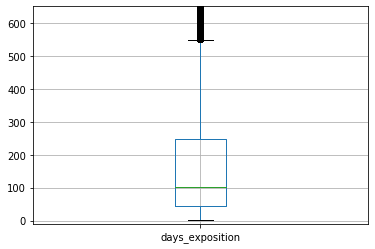

In [316]:
# функция для постройки ящика с усами и выводу рекомендации по отброске выбросов
def function_for_building_boxplot(data_set, column1):
    Q1 = np.percentile(data_set[column1],25) # первый квантиль
    Q3 = np.percentile(data_set[column1],75) # третий квантиль
    IQR = Q3 - Q1 # межквартильный диапазон
    max_value = round(Q3 + 2 * IQR) # # минимальное значение интервала построения графика
    min_value = round(Q1 - 2 * IQR) # максимальное значение интервала построения графика
    plt.ylim(-10,max_value)
    return (data_set.boxplot(column = column1), 
            print('Для столбца:',column1,'следует отбросить значения ваше {}, как выбросы'.format(round(Q3 + 1.5 * IQR))))
#sold_housing.boxplot(column='days_exposition') # отображение диаграммы ящика с усами
#plt.ylim(-10, 553) # изменение осей графика
function_for_building_boxplot(sold_housing_time, 'days_exposition')

Проверим наличие выбросов в других столбцах

проверим выбросы в столбце *last_price*

Для столбца: last_price следует отбросить значения ваше 12136604.0, как выбросы


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9ce0fb4d0>, None)

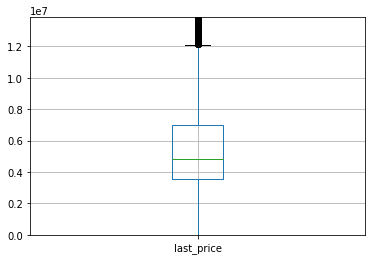

In [317]:
function_for_building_boxplot(sold_housing, 'last_price')

Аналогично поступим со столбцом общей жилой площади

Для столбца: total_area следует отбросить значения ваше 116.0, как выбросы


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9ce0e2190>, None)

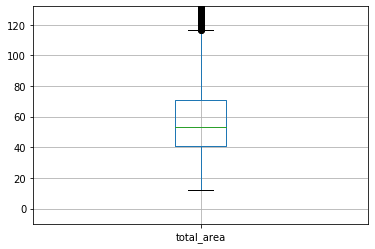

In [318]:
function_for_building_boxplot(sold_housing, 'total_area')

Аналогично поступим со столбцом числа комнат

Для столбца: rooms следует отбросить значения ваше 6.0, как выбросы


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9ce05c450>, None)

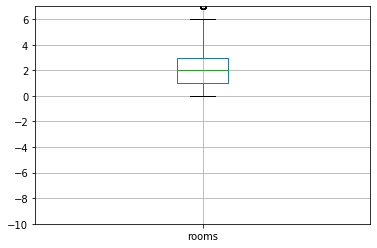

In [319]:
function_for_building_boxplot(sold_housing,'rooms')

Проверять на выбросы столбец с высотой потолков не имеет смысла, так как ранее из него уже были удалены некорректные значения

##### Отфильтруем таблицу данных от выбросов, основываясь на выше полученных результатах 

In [320]:
sold_housing = sold_housing.query('(days_exposition <= 550) & (last_price <= 11500000) & (total_area <= 113) & (rooms <= 6)')
sold_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10088 entries, 1 to 14422
Data columns (total 30 columns):
total_images              10088 non-null int64
last_price                10088 non-null int64
total_area                10088 non-null float64
first_day_exposition      10088 non-null datetime64[ns]
rooms                     10088 non-null int64
ceiling_height            10088 non-null float64
floors_total              10088 non-null int64
living_area               10088 non-null float64
floor                     10088 non-null int64
is_apartment              1272 non-null object
studio                    10088 non-null bool
open_plan                 10088 non-null bool
kitchen_area              10088 non-null float64
balcony                   5369 non-null float64
locality_name             10088 non-null object
airports_nearest          7942 non-null float64
cityCenters_nearest       7951 non-null float64
parks_around3000          7951 non-null float64
parks_nearest            

In [321]:
sold_housing['rooms'].value_counts()

1    3777
2    3626
3    2254
4     336
0      66
5      27
6       2
Name: rooms, dtype: int64

In [322]:
rooms_pivot_new = round(sold_housing.pivot_table(index = 'rooms', 
                                     values = ['total_area','last_price','ceiling_height','days_exposition']), 2)
rooms_pivot_new

,ceiling_height,days_exposition,last_price,total_area
rooms,,,,
0,2.75,101.86,3007062.88,27.12
1,2.66,123.54,3780442.24,37.26
2,2.68,129.35,5042761.99,54.03
3,2.69,148.64,5971480.08,70.33
4,2.77,152.43,6678754.63,81.23
5,2.95,212.93,7628518.52,94.12
6,2.62,36.50,7982000.00,103.00


После удаления выбросов видно, что квартиры с большим числом комнат также продаются довольно быстро как и квартиры с числом комнат до 3 (меньше года)

---
## Комментарий от наставника

Выбросы есть и в других столбцах. Их тоже надо удалить из данных. Делай это также на основании графика boxplot. Попробуй автоматизировать и этот процесс. 

---
#### Ответ на комментарий
выбросы в остальных столбцах удалены. Написана функция, которая возвращает ящик с усами и рекомендацию по удалению выбросов.

Изучим, зависимость цены от обей площади, числа комнат, этажа, удалённости от центра. Отдельно посмотрим на зависимость цены от этажа по категориям перавый, последний.

In [323]:
# создадим таблицу данных для исследования зависимости цены квартиры от её параметров
data1 = data.query('(days_exposition <= 550) & (last_price <= 11500000) & (total_area <= 113) & (rooms <= 6)').copy(deep=True)
analysis_price_parameters = data1.iloc[:, [1,2,4,8,16,27]].copy(deep=True)
analysis_price_parameters['last_price'] = analysis_price_parameters['last_price'].astype('int')
print(analysis_price_parameters.info())
analysis_price_parameters

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10088 entries, 1 to 14422
Data columns (total 6 columns):
last_price                10088 non-null int64
total_area                10088 non-null float64
rooms                     10088 non-null int64
floor                     10088 non-null int64
cityCenters_nearest       7951 non-null float64
category_floor_housing    10088 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 551.7+ KB
None


,last_price,total_area,rooms,floor,cityCenters_nearest,category_floor_housing
1,10000000,100.0,2,13,8098.0,другой
2,5400000,61.0,3,7,15008.0,другой
3,5050000,39.6,1,3,13878.0,другой
4,3550000,42.8,2,5,33058.0,последний
5,6700000,82.0,3,1,10698.0,первый
...,...,...,...,...,...,...
14418,3300000,31.0,1,6,11602.0,другой
14419,9200000,101.0,3,12,14428.0,другой
14420,3550000,35.3,1,4,16081.0,другой
14421,9470000,72.9,2,7,4489.0,другой


In [324]:
analysis_price_parameters.corr() # посмотрим на таблицу коэффициентов корреляции Пирсона

,last_price,total_area,rooms,floor,cityCenters_nearest
last_price,1.000000,0.703062,0.448195,0.144217,-0.340643
total_area,0.703062,1.000000,0.806465,-0.026982,-0.124417
rooms,0.448195,0.806465,1.000000,-0.180704,-0.075295
floor,0.144217,-0.026982,-0.180704,1.000000,-0.026170
cityCenters_nearest,-0.340643,-0.124417,-0.075295,-0.026170,1.000000


Надлюдаем слабую зависимость цены квартиры лишь от одного параметра - общая площадь. В остальных случаях зависимость практически отсутствует. Отметим, что практически отсутствует отрицательная корреляция цены с удалённостью от центра (чем ближе к центру города, тем дороже). В центре города находятся административные здания и коммерческая недвижимость. Посмотрим на корреляцию цены от метража квартиры на графике.

---
## Комментарий от наставника

Верно, найдены основные параметры, от которых зависит цена.

---

(0, 100)

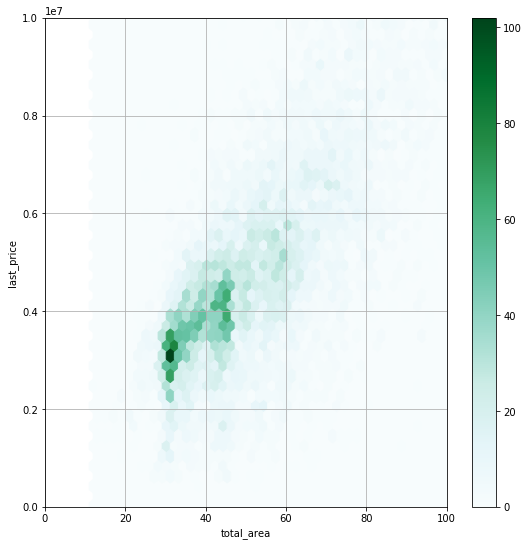

In [325]:
price_from_total_area = analysis_price_parameters.iloc[:, [0,1]].copy(deep=True)
price_from_total_area.plot(x='total_area', y='last_price', kind='hexbin', 
                           gridsize=50, figsize=(9, 9), sharex=False, grid=True)
plt.ylim(0, 1e7)
plt.xlim(0, 100)

Из графика видно, что в основном продают и покупают квартиры с площадью от 30 до 50 квадратных метров (основной семент рынка) и ценой от 2 до 5 миллионов рублей. Видна положительная корреляция цены и общего метража квартиры.

Влияет ли на цену квартиры её расположение в здании (первый этаж или последний этаж)? Для этого сравним медианную цену квартир на первом этаже со средней ценой квартиры на последнем этаже:

In [326]:
# сгруппируем по категории расположения квартир на этаже и посчитаем меиану
price_from_category_floor_housing = analysis_price_parameters.groupby('category_floor_housing')['last_price'].median()
price_from_category_floor_housing

category_floor_housing
другой       4600000
первый       3850000
последний    4160000
Name: last_price, dtype: int64

Квартиры на первом этаже оказались дешевле квартир на последнем этаже. Квартиры, которые расположены не на первом и не на последнем этаже имеют более высокую цену.

Изучим зависимость цены квартир от даты размещения: дня недели, месяца и года.

In [327]:
analysis_date_publication = data.iloc[:, [1,24,25,26]].copy(deep=True) #выберим из исходной таблицы нужные столбцы
print(analysis_date_publication.info())
analysis_date_publication

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14426 entries, 0 to 14425
Data columns (total 4 columns):
last_price           14426 non-null int64
day_publication      14426 non-null int64
month_publication    14426 non-null int64
year_publication     14426 non-null int64
dtypes: int64(4)
memory usage: 450.9 KB
None


,last_price,day_publication,month_publication,year_publication
0,13000000,3,3,2019
1,10000000,1,6,2018
2,5400000,6,2,2017
3,5050000,3,11,2017
4,3550000,5,7,2017
...,...,...,...,...
14421,9470000,3,10,2016
14422,4600000,4,8,2016
14423,9700000,1,3,2017
14424,11475000,1,3,2017


,last_price,day_publication,month_publication,year_publication
last_price,1.000000,-0.016827,0.002804,-0.052382
day_publication,-0.016827,1.000000,-0.007203,-0.002790
month_publication,0.002804,-0.007203,1.000000,-0.301686
year_publication,-0.052382,-0.002790,-0.301686,1.000000


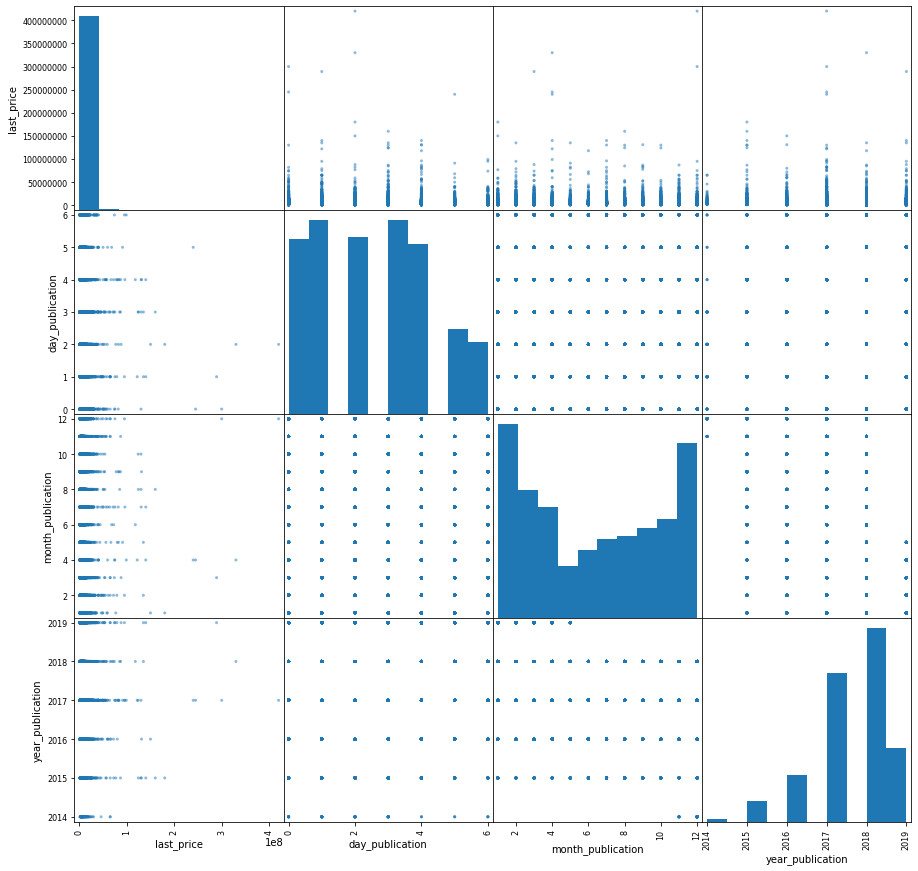

In [328]:
pd.plotting.scatter_matrix(analysis_date_publication, figsize=(15, 15)) # построим матрицу рассеяния
analysis_date_publication.corr() # посмотрим коэффициенты корреляции Пирсона

---
## Комментарий от наставника

Это также является одним из способов автоматизации процесса построения графиков.

---

Коэффициенты Пирсона близки к нулю, следовательно цены на квартиры не зависят от даты публикации объявлений, несмотря на то, что с 2014 по 2018 год росло число публикаций объявлений о продаже квартир. Обявления в основном публикуют в рабочие дни, а в году пик числа публикаций объявлений о продаже квартир приходится на начало года и конец года. 

In [329]:
data = data.query('short_locality_name != "nan"') # отфильтруем таблицу от значений с неизвестным местом публикации
# создадим сводную таблицу по городам, и посчитаем число объявлений в них и среднюю стоимость одного квадратного метра
top_city = data.pivot_table(index = 'short_locality_name', values = 'cost_per_square_meter',
                    aggfunc = ['count', 'mean'])
# отсортируем сводную таблицу по убыванию числа объявлений по городам
top_city = top_city.sort_values(('count','cost_per_square_meter'),ascending = False)
# для удобства восприятия, округлим значения в столбце стоимости одного квадратного метра до целых
top_city['mean','cost_per_square_meter'] = round(top_city['mean','cost_per_square_meter'],0)
# выведим список топ-10 городов по числу объявлений
top_city.head(10)

,count,mean
,cost_per_square_meter,cost_per_square_meter
short_locality_name,,
Санкт-Петербург,10057,115455.0
Всеволожск,271,67435.0
Пушкин,234,103920.0
Мурино,226,87773.0
Шушары,217,79539.0
Колпино,203,75938.0
Кудрово,194,96106.0
Гатчина,148,70025.0


In [330]:
# топ-10 населённых пунктов с самой дорогой недвижимостью
top_city = top_city.sort_values(('mean','cost_per_square_meter'),ascending = False)
top_city.head(10)

,count,mean
,cost_per_square_meter,cost_per_square_meter
short_locality_name,,
Санкт-Петербург,10057,115455.0
Зеленогорск,19,113036.0
Мистолово,3,107123.0
Бор,1,105540.0
Репино,4,104240.0
Пушкин,234,103920.0
Сестрорецк,129,102267.0
Кудрово,194,96106.0


In [331]:
# топ-10 населённых пунктов с самой дешёвой недвижимостью
top_city = top_city.sort_values(('mean','cost_per_square_meter'))
top_city.head(10)

,count,mean
,cost_per_square_meter,cost_per_square_meter
short_locality_name,,
Кара Вахнова,1,11690.0
Совхозный,1,12560.0
Ефимовский,1,12690.0
Фалилеево,1,13300.0
Житково,1,15650.0
Почап,1,16040.0
Важины,1,16670.0
Серебрянский,2,16755.0


Как и следовало ожидать, наибольшее число объявлений приходится на Санкт-Петербург, а также на Мурино, Кудров и Шушары. Цена квадратного метра в Санкт-Питербурге и Зеленогорске одна изсамых высоких. Высокие цены также в населённых пунктах Пушкин и Сестрорецк. В небольших населённых пунктах стоимость квадратного метра жилья значительно меньше. 

In [332]:
top_city = round(data.pivot_table(index = 'short_locality_name', values = 'cost_per_square_meter').reset_index())
top_city = top_city.sort_values('cost_per_square_meter', ascending = False)
top_city.head(20)

,short_locality_name,cost_per_square_meter
178,Санкт-Петербург,115455.0
51,Зеленогорск,113036.0
113,Мистолово,107123.0
8,Бор,105540.0
170,Репино,104240.0
163,Пушкин,103920.0
188,Сестрорецк,102267.0
89,Кудрово,96106.0
201,Стрельна,91006.0
136,Парголово,90902.0


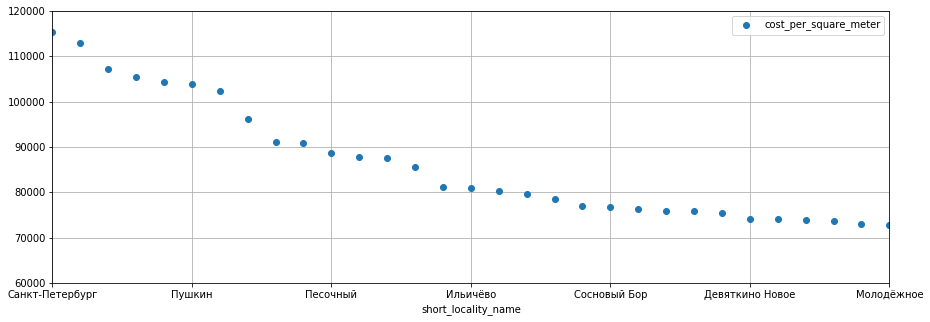

In [333]:
top_city.plot(x='short_locality_name', y='cost_per_square_meter', style='o', xlim=(0, 30), ylim=(60000, 120000), 
                                        grid=True, figsize=(15, 5))

Зависимость цены от населённых пунктов (цена отсортирована в порядке убывания)

---
## Комментарий от наставника

Результат верный, можно привести график зависимости цены от местоположения.

---
#### Ответ на комментарий
Добавлен требуемый график

<font color=blue> Что находится между Санкт-Петербургом и  городом Пушкин? В случае работы с номинативными данными стоит указывать все возможные значения.
    
---


Теперь изучим предложения квартир, для которых известо расстоянии до центра

In [334]:
# добавим в таблицу данных значение расстояния до центра города в километрах 
# и округлим их до целых значений
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)
# по понятным причинам нам нужно отфильтровать таблицу от нулевых значений расстояния до центра города
data = data.query('cityCenters_nearest_km != 0').copy(deep=True)
# добавим в таблицу данных столбец цена за один километр и округлим её до целых значений
data['price_per_km'] = round(data['last_price'] / data['cityCenters_nearest_km'], 0)
# добавим в таблицу данных столбец цена за один километр и округлим её до целых значений
data['price_per_km'] = round(data['last_price'] / data['cityCenters_nearest_km'], 0)
# создадим новую таблицу в которую добавим столбцы из data - цена, название населённого пункта,
#асстояние до центра и стоимость одного километра.
analysis_cityCenters_nearest = data.iloc[:, [1,22,30,31]].copy(deep=True)
#отсортируем таблицу так, чтобы в ней остались только объявления из Санкт-Петербурга
analysis_cityCenters_nearest = analysis_cityCenters_nearest.query('short_locality_name == "Санкт-Петербург"')

In [335]:
# сгруппируем данные по расстоянию до центра города и найдём среднюю цену по группам.
analysis_cityCenters_nearest_pivot = round(analysis_cityCenters_nearest.pivot_table(index = 'cityCenters_nearest_km', 
                                     values = 'price_per_km', aggfunc = 'mean'),0).reset_index()
analysis_cityCenters_nearest_pivot.head()

,cityCenters_nearest_km,price_per_km
0,1.0,21375198.0
1,2.0,8781475.0
2,3.0,3749278.0
3,4.0,3151235.0
4,5.0,2839974.0


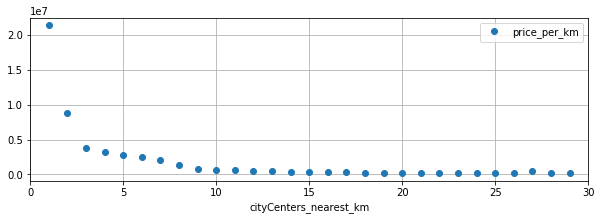

In [336]:
# построим график зависимости цены за километр от растояния до центра.
analysis_cityCenters_nearest_pivot.plot(x='cityCenters_nearest_km', y='price_per_km', 
                                        style='o', xlim=(0, 30), 
                                        grid=True, figsize=(10, 3))

Из графика видно, что центр города ограничен областью до 3 км, где стоимость квадратного метра жилья наибольшая

---
## Комментарий от наставника

Верный выбор центральной части города.

---

Проанализируем квартиры в центре Санкт-Питербурга по следующим параметрам: площадь, цена, число комнат, высота потолков.

In [338]:
# сперва отфильтруем таблицу по имени Санкт-Петербург и расстоянию не более 3 км до центра города, 
# сохраним её в новой переменной
data2 = data.query('short_locality_name == "Санкт-Петербург" & cityCenters_nearest_km <= 3').copy(deep=True)
# создадим новую таблицу в которую добавим столбцы из data - цена, площадь квартиры, число комнат, высота потолков и др.
analysis_SPB_center1 = data2.iloc[:,[1,2,4,5,8,16,24,25,26,27]].copy(deep=True)
#data1.info()
analysis_SPB_center1 = analysis_SPB_center1.sort_values('last_price', ascending = False)
analysis_SPB_center1

,last_price,total_area,rooms,ceiling_height,floor,cityCenters_nearest,day_publication,month_publication,year_publication,category_floor_housing
882,330000000,190.0,3,3.50,5,1197.0,2,4,2018,другой
13916,289238400,187.5,2,3.37,6,1073.0,1,3,2019,последний
1537,159984000,242.4,4,3.85,7,2242.0,3,8,2015,другой
8438,130000000,231.0,6,3.60,4,1280.0,3,8,2015,другой
12835,124350000,248.7,4,3.40,4,2242.0,3,8,2015,другой
...,...,...,...,...,...,...,...,...,...,...
13103,3100000,22.7,0,3.33,2,3363.0,2,8,2018,другой
6248,2800000,31.0,1,2.60,1,3238.0,0,1,2018,первый
3160,2750000,38.1,1,2.82,1,2357.0,5,5,2016,первый
3202,2645000,24.4,1,3.33,2,2814.0,0,12,2018,другой


In [339]:
analysis_SPB_center1.corr() # посмотрим коэффициенты корреляции Пирсона для квартир В центре Санкт-Питербурга

,last_price,total_area,rooms,ceiling_height,floor,cityCenters_nearest,day_publication,month_publication,year_publication
last_price,1.000000,0.520685,0.229943,0.159782,0.190761,-0.158420,-0.012897,-0.003584,-0.000706
total_area,0.520685,1.000000,0.751154,0.191592,0.172860,-0.103167,-0.017084,-0.013272,-0.050938
rooms,0.229943,0.751154,1.000000,0.080731,0.113654,-0.076240,-0.004166,-0.056243,-0.052968
ceiling_height,0.159782,0.191592,0.080731,1.000000,-0.013375,-0.035720,0.025739,0.019239,-0.034440
floor,0.190761,0.172860,0.113654,-0.013375,1.000000,0.043174,0.108980,-0.060646,0.061732
cityCenters_nearest,-0.158420,-0.103167,-0.076240,-0.035720,0.043174,1.000000,-0.056611,-0.014354,0.075199
day_publication,-0.012897,-0.017084,-0.004166,0.025739,0.108980,-0.056611,1.000000,-0.021739,0.003907
month_publication,-0.003584,-0.013272,-0.056243,0.019239,-0.060646,-0.014354,-0.021739,1.000000,-0.200729
year_publication,-0.000706,-0.050938,-0.052968,-0.034440,0.061732,0.075199,0.003907,-0.200729,1.000000


Из таблицы с коффициентами корреляции Пирсона видно, есть слабая зависимость цены от общей площади и только от неё.

In [340]:
# сгруппируем по категории расположения квартир на этаже и посчитаем меиану
analysis_SPB_center1 = analysis_SPB_center1.groupby('category_floor_housing')['last_price'].median()
analysis_SPB_center1

category_floor_housing
другой       10900000
первый        7500000
последний     9050000
Name: last_price, dtype: int64

Построим графики сравнения цены от других параметров для центра города и остальных районов города.

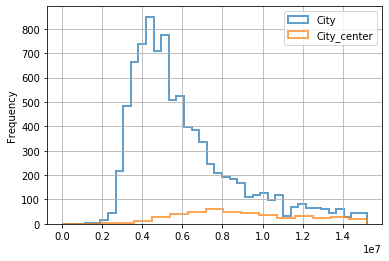

In [341]:
# данные по Санкт-Петербургу не входящие в центральный район
data2 = data.query('short_locality_name == "Санкт-Петербург" & cityCenters_nearest_km > 3').copy(deep=True)
data_city_outskirts = data2.iloc[:,[1,2,4,5,8,16,24,25,26,27]].copy(deep=True)
# данные по центру Санкт-Петербургу
data3 = data.query('short_locality_name == "Санкт-Петербург" & cityCenters_nearest_km <= 3').copy(deep=True)
data_for_SPB_center = data3.iloc[:,[1,2,4,5,8,16,24,25,26,27]].copy(deep=True)
# функция для построения ступенчатых гистограм для сравнения параметров квартир в центре города
# со значениями по городу в целом 
def function_building_two_histograms(column_city, column_center):
    N1 = len(column_city.unique()) # находим объём выборки, как длину списка уникальных значений
    k1 = round(math.sqrt(N1)) # определение “оптимального” числа интервалов как квадратный корень из N
    N2 = len(column_center.unique())
    k2 = round(math.sqrt(N2))
    Q1_city = np.percentile(column_city,25) # первый квантиль
    Q3_city = np.percentile(column_city,75) # третий квантиль
    IQR_city = Q3_city - Q1_city # межквартильный диапазон
    max_value = round(Q3_city + 2 * IQR_city) # # минимальное значение интервала построения графика
    ax = column_city.plot(kind='hist', histtype='step', range=(0, max_value), bins=k1, 
                            linewidth=2, alpha=0.7, label='City', legend=True)
    city_center = column_center.plot(kind='hist', histtype='step', range=(0, max_value), bins=k2, 
                                     linewidth=2, alpha=0.7, label='City_center', ax=ax, 
                                     grid=True, legend=True)
    return city_center
function_building_two_histograms(data_city_outskirts['last_price'], data_for_SPB_center['last_price'])

Цены на жильё в центре Санкт-Петербурге явно выше, чем в других районах.

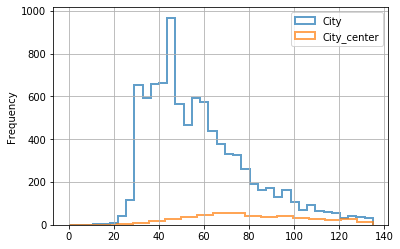

In [342]:
function_building_two_histograms(data_city_outskirts['total_area'], data_for_SPB_center['total_area'])

Площадь квартир в центре Санкт-Петербурге также выше общей площади квартир по другим районам города.

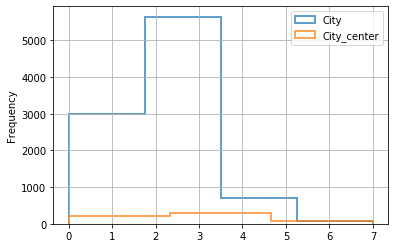

In [343]:
function_building_two_histograms(data_city_outskirts['rooms'], data_for_SPB_center['rooms'])

И как следствие большей общей площади квартир в центе Санкт-Питербурге, они имеют в среднем больше комнат.

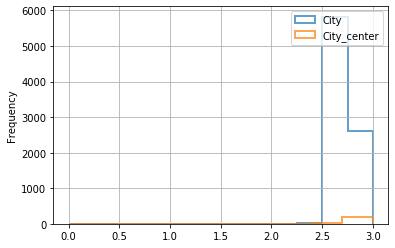

In [344]:
function_building_two_histograms(data_city_outskirts['ceiling_height'], data_for_SPB_center['ceiling_height'])

Потолки в квартирах в центре города тоже выше средних значений по городу.

### Вывод

Квартиры в центре Санкт-Петербурга стоят, в среднем, дороже квартир по городу. Это связано не только с их расмоложением, но и с параметрами квартир в центре. Они в среднем имеют большую общую площадь (больше комнат) и более высокие потолки.

---
## Комментарий от наставника

Все-таки центр обладает своими характерными чертами. Попробуй построить графики для центра и остальной части города по одинаковым параметрам на одном рисунке. Так различия будет проще найти.

---
#### Ответ на комментарий
Замечания учтены. Добавлены необходимые графики и выводы к ним.

<font color=blue> Все верно, графики позволяют обнаружить различия в характеристиках данных частей города.
    
---


### Шаг 5. Общий вывод

1) В таблице данных имелись пропуски, вызванные разными причинами (информация не указана продавцом, отсутствие парков или прудов в близи от дома, актуальность объявления, и как следствие ошибки при автоматическом заполнении других столбцов). Критичные пропуски в столбцах с важными данными были заполнны, а в таблицу были добавлены новые метрики: стоимость одного квадратного метра, отношение жилой площщади к общей площади квартиры и отношение площади кухни к общей площади. Была проведена категоризация квартир в зависимости от этажа (на первом, на последнем и все остальные). Добавлены столбцы с днём, месяцем и годом публикации объявлений.

2) Основной сегмент рынка квартир в Санкт-Петербурге и близлижащих населённых пунктов представляет собой квартиры с общей площадью от 30 до 60 кв.м. и стоимостью от 2 до 6 млн.р., в которых число комнат не превышает 2 и потолки имеют стандартную высоту от 2.5 до 3 м.

3) Квартиры в среднем продаются менее чем за 3 месяца. Квартиры со сроком продажи более 1.5 года должны вызывать беспокойство у покупателей. Так же установили, что объявления о продаже квартир люди чаще всего публикуют в будние дни, а в году пик числа публикаций приходится на начало и конец года. И цена не зависит от даты публикации.

4) Стоимость жилья главным образом зависит от его общей площади. Слабая зависимость цены от числа комнат объясняется тем, что число комнат является производной величеной от общей площади. Имеется слабая зависимость цены жилья от расстояния до центра города (чем ближе к центру, тем дороже). Квартиры на первом этаже самые дешёвые (по цене за 1 кв.м.), а квартиры на последнем этаже дешевле квартир на промежуточных этажах (по цене за 1 кв.м.).

5) Составлен топ-10 населённых пунктов с самой дорогой жилой недвижимостью: *Санкт-Петербург, Зеленогорск, Мистолово, Бор, Репино, Пушкин, Сестрорецк, Кудрово, Стрельна, Парголово.* Средняя стоимость одного квадратного метра в них превышала 90 тыс.р., из них (кроме Санкт-Петербурга) в топ-10 по числу объявлений также вошли *Кудрово, Пушкин и Парголово.*

6) Основываясь на графическом изображении зависимости цены от расстояния до центра города (учитывались объявления только по Санкт-Петербургу) была выделена область - центральный район города с расстоянием до центра менее 3 км. Сравнительный анализ данных центрального района с остальной частью города показал:в центре квартиры стоят дороже, площадь в них больше (следовательно чаще встречаются квартиры с большим числом комнат), и чаще встречаются квартиры с высотой потолков от 2.7 до 3 м. Можно сказать, что квартиры в центре относятся к элитному жилью с комфортными для проживания параметрами квартир и близко расположенной городской инфраструктурой.

<font color=blue> Выводы стали лучше. Приведены ответы на главные вопросы проекта.
    
---


---
## Комментарий от наставника

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам работы, в нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.

---

<font color=blue> Помарки исправлены, и теперь работа выполнена хорошо. Спасибо за обратную связь. Успехов в дальнейших проектах :)
    
---

## Комментарий от наставника

- Заполнение пропусков стоит делать осознанно. Исправь заполнение пропусков в столбце с удаленностью от центра;
- Автоматизируй построение графиков;
- Очищай данные от выбросов. Они вызывают смещение в данных;
- Доделай необходимые графики по зависимости цены от параметров для центра и остальной части города;
- Финальный вывод стоит делать подробно по результатам проведенной работы.

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Исправь все замечания и получится очень достойная работа :)

-----

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод